# 0. Preliminaries

1. Import plot decision boundary (for later usage). This imports the source file from the repo to the current directory.

In [1]:
from helper_functions import plot_decision_boundary
import torch

# Device independent code
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


# Steps 

1. Make data 



# 1. Data

## 1.1. Make data and labels

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs 

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

make_what = 'circles' # 'circles' or 'blobs'

n_samples = 1000

if (make_what == 'circles'):
    X , y= make_circles(n_samples= n_samples, noise=0.03, random_state= RANDOM_SEED)
elif (make_what == 'blobs'):

    X, y = make_blobs(n_samples=n_samples,
                                  n_features=NUM_FEATURES,
                                  centers=NUM_CLASSES,
                                  cluster_std= 0.1, # give the clusters a little shake up
                                  random_state=RANDOM_SEED)
else:
    print('Please choose a valid dataset to create')
    exit(1)




# data shape and type
print(make_what)
print(X.shape, y.shape)
print(type(X), type(y))

circles
(1000, 2) (1000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# 1.2. Convert data to tensors

In [3]:
import torch

X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()

# data shape and type
print(X.shape, y.shape)
print(type(X), type(y))

print(X[:5], y[:5])

torch.Size([1000, 2]) torch.Size([1000])
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]]) tensor([1, 1, 1, 1, 0])


## 1.3. Split data  into train and test

In [4]:
from  sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state= RANDOM_SEED)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#print a few samples and labels
n_samples = 5
print(X_train[:n_samples], y_train[:n_samples])
print(X_test[:n_samples], y_test[:n_samples])


torch.Size([800, 2]) torch.Size([800])
torch.Size([200, 2]) torch.Size([200])
tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]]) tensor([1, 0, 0, 0, 1])
tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438]]) tensor([1, 0, 1, 0, 1])


## 1.4 Plot data 

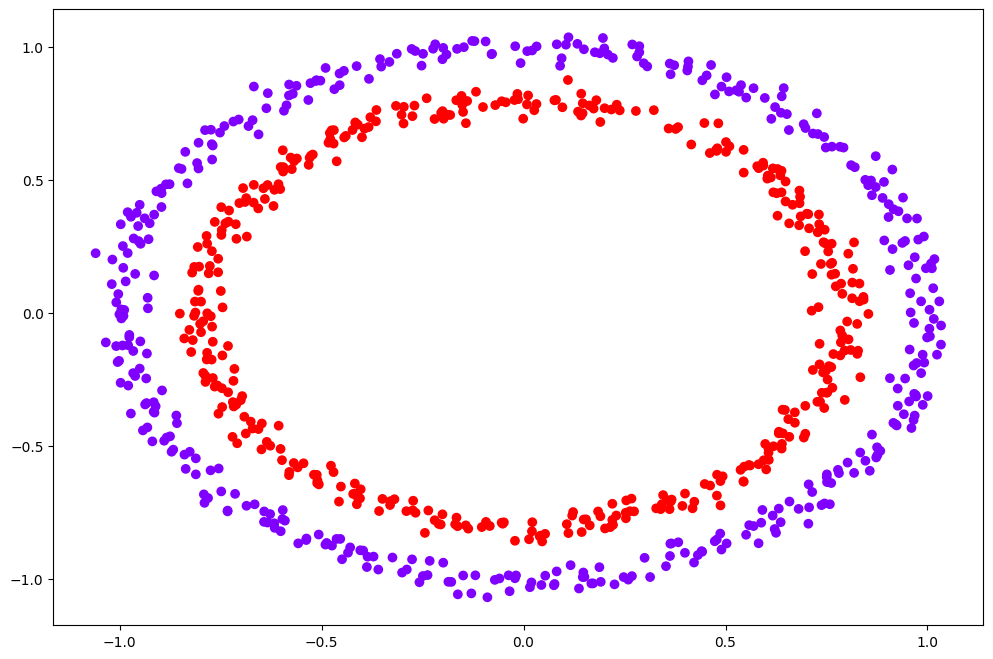

In [5]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')

# 2. Model

## 2.1 NN models

In [6]:
from torch import nn

class model0(nn.Module):
    def __init__(self, input_size, hidden_sizes,output_size):
        super(model0, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], output_size)
        
    def forward(self, x):
        x = self.fc3 (self.fc2 (self.fc1(x)) ) 
        return x

In [7]:


class model1(nn.Module):
    def __init__(self, input_size, hidden_sizes,output_size):
        super(model1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc3 (self.relu (self.fc2 (self.relu (self.fc1(x)) ) ) )
        return x

In [8]:
class model2(nn.Module):
    def __init__(self, input_size, hidden_sizes,output_size):
        super(model2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1],hidden_sizes[2])
        self.fc4 = nn.Linear(hidden_sizes[2], output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc4(self.relu (self.fc3 (self.relu (self.fc2 (self.relu (self.fc1(x)) ) ) )))
        return x

In [11]:
class model3(nn.Module):
    def __init__(self, input_size, hidden_sizes,output_size):
        super(model3,self).__init__()
        self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_size, out_features=hidden_sizes[0]),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_sizes[0], out_features=hidden_sizes[1]),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_sizes[1], out_features= output_size)
    )
    def forward(self, x):
        x = self.linear_layer_stack(x)
        return x

## 2.2 Initialize model

In [ ]:
input_size0 = 2
hidden_sizes0 = [3,2]
output_size0 = 2

hidden_sizes1 = [5,5,5]

input_size3 = NUM_FEATURES
hidden_sizes3 = [50,50]
output_size3 = NUM_CLASSES

model = model0(input_size0, hidden_sizes0,output_size0).to(device)
#model =  model3(input_size3, hidden_sizes3,output_size3).to(device)


print(model)


# 3. Optimizer and loss function

In [ ]:
#loss_fun = nn.BCEWithLogitsLoss()
loss_fun = nn.CrossEntropyLoss()

learning_rate = 0.001
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

# Note: optimizer knows model parameters. It is the one that updates them. Parameters have the grad attribute
# that is updated by the backward() method of the loss function. The optimizer uses the grad attribute to update
# the parameters. The grad attribute is set to zero by the zero_grad() method of the optimizer. This is done
# before the backward() method of the loss function is called.  


In [ ]:
# Accuraccy function. Takes the prediction and the labels and returns the accuracy
def accuracy_fun(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

# 4. Compute predictions with no training 

In [ ]:
# Get some output from model with no training
model.eval()
with torch.inference_mode():
    y_logits = model(X_test.to(device))

# Get the predictions
print(y_logits.shape)
print(y_logits.squeeze().shape)
print(y_logits[:5])

y_pred = torch.argmax(y_logits, dim=1)
print(y_pred.shape)
print(y_pred[:5])

y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:5])
y_pred2 = torch.argmax(y_pred_probs, dim=1)
print(y_pred2[:5])  # should be the same as y_pred previously calculated

# 5. Model training

## 4.1 Training loop

In [ ]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED) 

# Move data to device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Loop over epochs
epochs = 3000

for epoch in range(epochs):
    
    # Training mode
    model.train()

    # Forward pass
    y_logits = model(X_train).squeeze()
    #y_pred = torch.round(torch.sigmoid(y_logits))
    y_pred = torch.argmax(y_logits, dim=1)
 
    if epoch == 0:
        print(y_logits.shape, y_pred.shape, y_train.shape) # check shapes

    # Compute Loss
    loss = loss_fun(y_logits, y_train)
    acc = accuracy_fun(y_train, y_pred)

    # Zero out gradients, backward pass and update parameters
    optimizer.zero_grad() # same as model.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model.eval()

    with torch.inference_mode():
        y_logits_test = model(X_test)
        y_pred_test = torch.argmax(y_logits_test, dim=1)
        loss_test = loss_fun(y_logits_test, y_test)
        test_acc = accuracy_fun(y_test, y_pred_test)



    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, loss: {loss:.3f}, loss_test: {loss_test:.3f}, \
              acc: {test_acc:.3f}')

# 5. Make predictions

In [ ]:
model.eval()
with torch.inference_mode():
    y_logits_test = model(X_test)
    y_pred_test = torch.argmax(y_logits_test, dim=1)
    loss_test = loss_fun(y_logits_test, y_test)
    loss_acc = accuracy_fun(y_test, y_pred_test)


print(y_pred_test[:10], y_test[:10])
print(f'loss_test: {loss_test:.3f}, acc: {loss_acc:.3f}')

# 6. Plot decision boundary

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
print(X_train.shape, y_train.shape)
plot_decision_boundary(model, X_train, y_train)
plt.title('Train')
plt.subplot(1, 2, 2)
plot_decision_boundary(model, X_test, y_test)
plt.title('Test')